# Unsupervised learning

In episode 2 we learnt about supervised learning. Now it is time to explore unsupervised learning. 

Sometimes we do not have the luxury of using labelled data. This could be for a number of reasons:

* We have labelled data, but not enough to accurately train our model
* Our existing labelled data is low-quality or innacurate
* It is too time-consuming to (manually) label more data
* We have data, but no idea what correlations might exist that we could model!

In this case we need to use unsupervised learning. As the name suggests, this time we do not "supervise" the ML algorithm by providing it labels, but instead we let it try to find its own patterns in the data and report back on any correlations that it might find. You can think of unsupervised learning as a way to discover labels from the data itself.

# Clustering

Clustering is the grouping of data points which are similar to each other. It can be a powerful technique for identifying patterns in data.
Clustering analysis does not usually require any training and is therefore known as an unsupervised learning technique. Clustering can be applied quickly due to this lack of training.

## Applications of clustering
* Looking for trends in data
* Reducing the data around a point to just that point (e.g. reducing colour depth in an image)
* Pattern recognition

## K-means clustering

The k-means clustering algorithm is a simple clustering algorithm that tries to identify the centre of each cluster.
It does this by searching for a point which minimises the distance between the centre and all the points in the cluster.
The algorithm needs to be told how many k clusters to look for, but a common technique is to try different numbers of clusters and combine
it with other tests to decide on the best combination. 

> ## Hyper-parameters again
> 'K' is also an exmaple of a *hyper-parameter* for the k-means clustering technique. Another example of a hyper-parameter is the N-degrees of freedom for polynomial regression. Keep an eye out for others throughout the lesson!

### K-means with Scikit-Learn

To perform a k-means clustering with Scikit-Learn we first need to import the sklearn.cluster module.

In [1]:
import sklearn.cluster as skl_cluster

For this example, we're going to use Scikit-Learn's built-in 'random data blob generator' instead of using an external dataset. Therefore we'll need the `sklearn.datasets.samples_generator` module.

In [2]:
import sklearn.datasets as skl_datasets

Now lets create some random blobs using the `make_blobs` function. The `n_samples` argument sets how many points we want to use in all of our blobs while `cluster_std` sets the standard deviation of the points. The smaller this value the closer together they will be. `centers` sets how many clusters we'd like. `random_state` is the initial state of the random number generator. By specifying this value we'll get the same results every time we run the program. If we don't specify a random state then we'll get different points every time we run. This function returns two things: an array of data points and a list of which cluster each point belongs to.

Lets create the clusters.

In [3]:
N_true_clusters = 4
data, cluster_id = skl_datasets.make_blobs(n_samples=400, cluster_std=0.6, centers=N_true_clusters, random_state=1)


In [5]:
data[:10,:]

array([[ -6.06412563,  -3.13004774],
       [ -1.72582812,   4.03607263],
       [ -7.89381282,  -3.81678833],
       [ -6.84140807,  -8.24232199],
       [ -7.15079963,  -7.53343784],
       [-10.5580613 ,  -4.27316074],
       [ -9.60496441,  -3.98406162],
       [ -9.62692118,  -4.06385434],
       [ -6.87871881,  -9.40977679],
       [ -6.33980839,  -7.48380702]])

We can make a simple plot of all the data together.

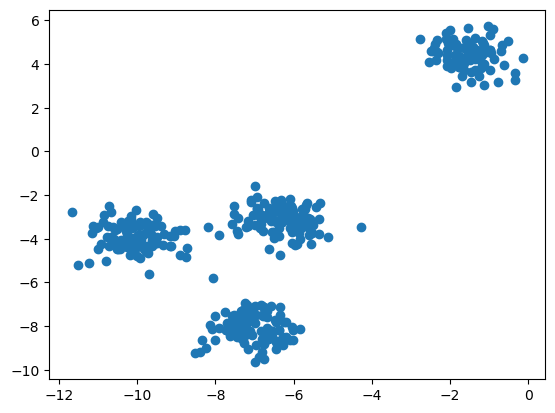

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=data[:,0], y=data[:,1]);

We'll also define a helper function to color code the clusters by `cluster_id`.

In [6]:
import numpy as np

def plot_true_clusters(data, labels):
    """
    Visualizes data points with associated labels using a color map and displays a legend.

    Parameters:
    data (ndarray): A 2D NumPy array with shape (n_samples, 2), representing the data points.
    labels (ndarray or list): A 1D array or list of labels corresponding to the data points.

    Returns:
    None: Displays the scatter plot with labels as colors and a color bar for the label legend.
    """
    # Extract the x and y coordinates from the data
    tx = data[:, 0]
    ty = data[:, 1]

    # Determine unique labels and number of classes
    unique_labels = np.unique(labels)
    n_labels = len(unique_labels)

    # Create a figure with a specified size
    fig = plt.figure(figsize=(5, 4))
    
    # Scatter plot the data points, coloring them by their labels and using a colormap
    sc = plt.scatter(tx, ty, c=labels, cmap="nipy_spectral", edgecolor='k')
    
    # Create colorbar with appropriate ticks
    cbar = plt.colorbar(sc, boundaries=np.arange(n_labels + 1) - 0.5)
    cbar.set_ticks(np.arange(n_labels))
    cbar.set_ticklabels(unique_labels)

    # Display the plot
    plt.show()


In [7]:
help(plot_true_clusters)

Help on function plot_true_clusters in module __main__:

plot_true_clusters(data, labels)
    Visualizes data points with associated labels using a color map and displays a legend.

    Parameters:
    data (ndarray): A 2D NumPy array with shape (n_samples, 2), representing the data points.
    labels (ndarray or list): A 1D array or list of labels corresponding to the data points.

    Returns:
    None: Displays the scatter plot with labels as colors and a color bar for the label legend.



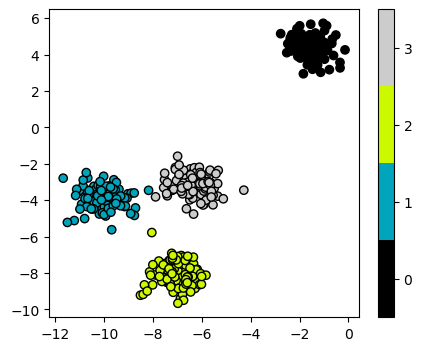

In [12]:
# plot true clusters
plot_true_clusters(data, cluster_id)

Now that we have some data we can try different algorithms to see if we can detect/recover the true clusters. We'll start with the K-means clustering algorithm.

First, we need to initialise the KMeans module and tell it how many clusters to look for. Next, we supply it with some data via the `fit` function, in much the same way we did with the regression functions earlier on. Finally, we run the predict function to find the clusters.

In [13]:
# define the number of clusters to look for
N_pred_clusters = 4

# init clustering model
Kmean = skl_cluster.KMeans(n_clusters=N_pred_clusters)

# fit/train model
Kmean.fit(data)

# get cluster label predictions
pred_cluster_id = Kmean.predict(data)

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


The data can now be plotted to show all the points we randomly generated. To make it clearer which cluster points have been classified we can set the colours (the c parameter) to use the `clusters` list that was returned by the `predict` function. The Kmeans algorithm also lets us know where it identified the centre of each cluster. These are stored as a list called 'cluster_centers_' inside the `Kmean` object. Let's plot the points from the clusters, colouring them by the output from the K-means algorithm, and also plot the centres of each cluster as a red X.

In [14]:
# display cluster centers (x and y coord.)
Kmean.cluster_centers_

array([[-10.0620126 ,  -3.92756495],
       [ -1.53592278,   4.42530483],
       [ -7.06109567,  -8.05756019],
       [ -6.32216056,  -3.14394353]])

In [15]:
def plot_pred_clusters(data, pred_cluster_id, Kmean):
    """
    Visualizes clustered data points with centroids marked.

    Parameters:
    data (ndarray): A 2D NumPy array with shape (n_samples, 2), representing the data points.
    pred_cluster_id (ndarray or list): A 1D array or list of cluster assignments for each data point.
    Kmean (KMeans object): The fitted KMeans object containing cluster centers.

    Returns:
    None: Displays the scatter plot with clusters as colors and centroids marked with red crosses.
    """
    # Extract the x and y coordinates from the data
    tx = data[:, 0]
    ty = data[:, 1]
    
    # Create a figure with a specified size
    fig = plt.figure(1, figsize=(4, 4))
    
    # Scatter plot the data points, coloring them by their cluster assignment
    # plt.scatter(tx, ty, s=5, linewidth=0, c=clusters)
    plt.scatter(tx, ty, c=pred_cluster_id, cmap="nipy_spectral", edgecolor='k')

    # Loop through cluster centers and mark them with a red 'x'
    if Kmean is not None:
        for cluster_x, cluster_y in Kmean.cluster_centers_:
            plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
    
    # Display the plot
    plt.show()

In [16]:
help(plot_pred_clusters)

Help on function plot_pred_clusters in module __main__:

plot_pred_clusters(data, pred_cluster_id, Kmean)
    Visualizes clustered data points with centroids marked.

    Parameters:
    data (ndarray): A 2D NumPy array with shape (n_samples, 2), representing the data points.
    pred_cluster_id (ndarray or list): A 1D array or list of cluster assignments for each data point.
    Kmean (KMeans object): The fitted KMeans object containing cluster centers.

    Returns:
    None: Displays the scatter plot with clusters as colors and centroids marked with red crosses.



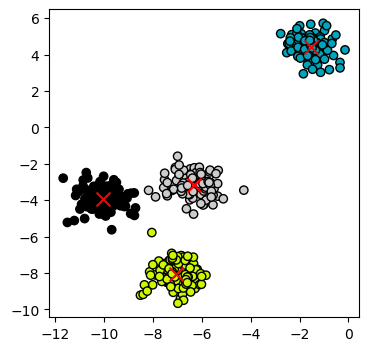

In [17]:
# plot predicted clusters
plot_pred_clusters(data, pred_cluster_id, Kmean)

> ## Working in multiple dimensions
> Although this example shows two dimensions, the kmeans algorithm can work in more than two. It becomes very difficult to show this visually
> once we get beyond 3 dimensions. Its very common in machine learning to be working with multiple variables and so our classifiers are working in
> multi-dimensional spaces.

### Assessing cluster quality with the silhouette score
Evaluating the quality of clusters is a crucial step in clustering analysis, as it helps determine how well the data points fit into their assigned clusters. A widely used metric for this purpose is the **silhouette score**, which measures how similar a data point is to its own cluster compared to other clusters. The silhouette score is defined for each data point and ranges from -1 to 1, where:

- **1** indicates the data point is well matched to its cluster and poorly matched to other clusters.
- **0** indicates the data point is on or very close to the decision boundary between clusters.
- **-1** indicates the data point may have been misclassified into the wrong cluster.

The silhouette score can be averaged across all data points to provide an overall measure of clustering quality. Additionally, examining silhouette scores for individual samples can help identify outliers or problematic clusters.

Here is the Python code to calculate both the overall silhouette score and the individual sample scores:

In [14]:
# import
from sklearn.metrics import silhouette_score, silhouette_samples

# Calculate the overall silhouette score
overall_silhouette = silhouette_score(data, pred_cluster_id)
print(f"Overall Silhouette Score: {overall_silhouette:.2f}")

# Calculate silhouette scores for individual samples
sample_silhouettes = silhouette_samples(data, pred_cluster_id)
sample_silhouettes

Overall Silhouette Score: 0.77


array([0.80836926, 0.90846803, 0.18271667, 0.83765046, 0.79979149,
       0.78580441, 0.75037921, 0.75489387, 0.75901919, 0.73423095,
       0.79380893, 0.78070688, 0.43689888, 0.90160051, 0.79880991,
       0.77857419, 0.9193586 , 0.8056028 , 0.77965372, 0.78998071,
       0.82700171, 0.89238832, 0.70979102, 0.90215967, 0.78220582,
       0.55130985, 0.79801493, 0.70930407, 0.79333238, 0.88685505,
       0.82983501, 0.78962561, 0.74590168, 0.76706408, 0.87831893,
       0.78099799, 0.92155144, 0.80520191, 0.72163663, 0.91519709,
       0.78423626, 0.71994805, 0.59930879, 0.77775666, 0.89449921,
       0.77788944, 0.73432942, 0.8295261 , 0.48725168, 0.80637549,
       0.75360641, 0.9228985 , 0.75412668, 0.92414676, 0.7663299 ,
       0.8776853 , 0.696073  , 0.78366527, 0.83607311, 0.73467177,
       0.75655691, 0.90840603, 0.81432201, 0.79323438, 0.82056183,
       0.63646981, 0.64722884, 0.91858634, 0.75243163, 0.83882118,
       0.53442913, 0.80021345, 0.70242079, 0.70130612, 0.43667

## Exercise: How many clusters should we look for?
Using k-means requires us to specify the number of clusters to expect. A common strategy to get around this is to vary the number of clusters we are looking for, and use the silhouette score to select the most appropriate number of clusters.

Use the code below to loop through searching for between 2 and 10 clusters, generating silhouette plots for each. Which (if any) of the results look more sensible? What criteria might you use to select the best one?


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import cluster as skl_cluster

def plot_silhouette(data, pred_cluster_id):
    """
    Calculates and plots silhouette scores for clustering results.
    
    Parameters:
    - data: array-like of shape (n_samples, n_features)
        Feature matrix of the dataset.
    - pred_cluster_id: array-like of shape (n_samples,)
        Cluster labels for each sample in the dataset.
        
    Returns:
    - overall_silhouette: float
        The overall silhouette score for the clustering result.
    """
    overall_silhouette = silhouette_score(data, pred_cluster_id)
    print(f"Overall Silhouette Score: {overall_silhouette:.2f}")

    sample_silhouettes = silhouette_samples(data, pred_cluster_id)

    y_lower = 1
    n_clusters = len(np.unique(pred_cluster_id))

    for i in range(n_clusters):
        cluster_silhouettes = sample_silhouettes[pred_cluster_id == i]
        cluster_silhouettes.sort()
        cluster_size = len(cluster_silhouettes)
        y_upper = y_lower + cluster_size

        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouettes,
            alpha=0.7
        )
        plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 10

    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster samples")
    plt.title("Silhouette Analysis")
    plt.xlim([-.2, 1])
    plt.show()

    return overall_silhouette



In [16]:
help(plot_silhouette)

Help on function plot_silhouette in module __main__:

plot_silhouette(data, pred_cluster_id)
    Calculates and plots silhouette scores for clustering results.
    
    Parameters:
    - data: array-like of shape (n_samples, n_features)
        Feature matrix of the dataset.
    - pred_cluster_id: array-like of shape (n_samples,)
        Cluster labels for each sample in the dataset.
    
    Returns:
    - overall_silhouette: float
        The overall silhouette score for the clustering result.



Finish the below for loop to run KMeans on each cluster_count option, then plot the resulting clusters using `plot_silhouette`.

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Overall Silhouette Score: 0.74


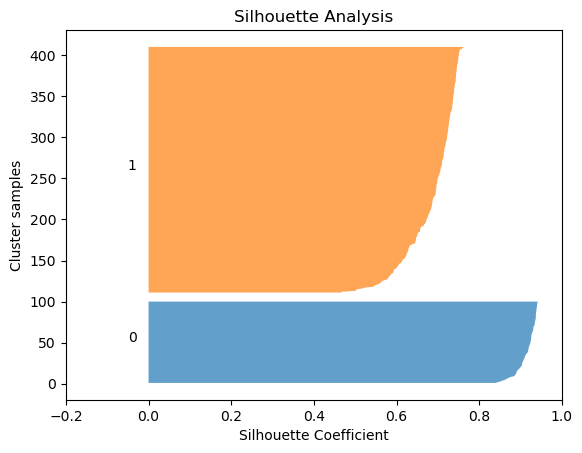

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Overall Silhouette Score: 0.68


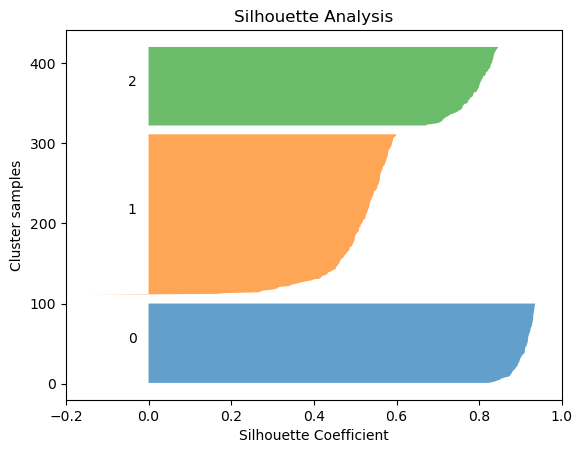

Overall Silhouette Score: 0.77


C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


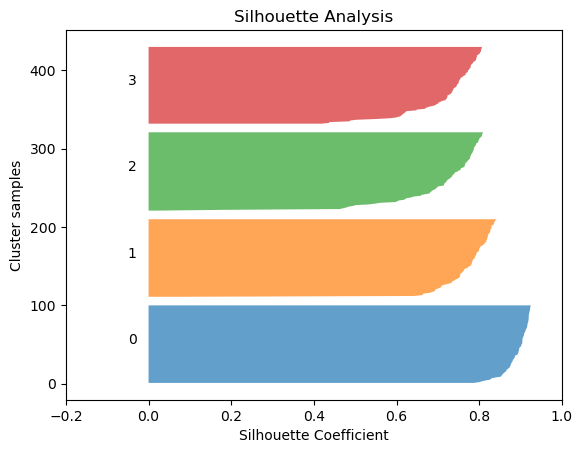

Overall Silhouette Score: 0.66


C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


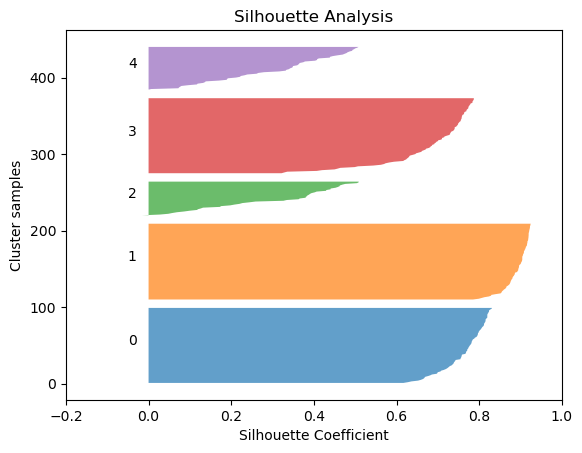

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Overall Silhouette Score: 0.57


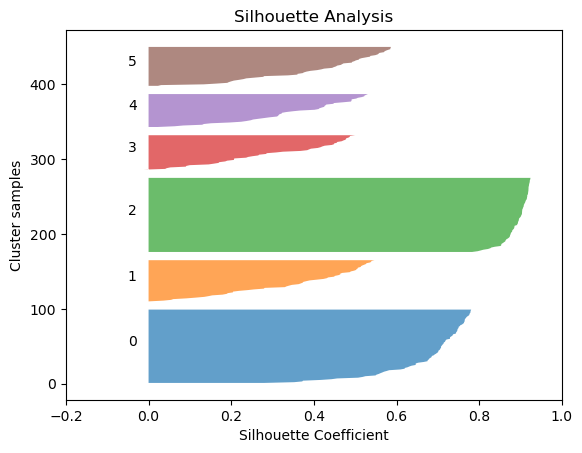

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Overall Silhouette Score: 0.49


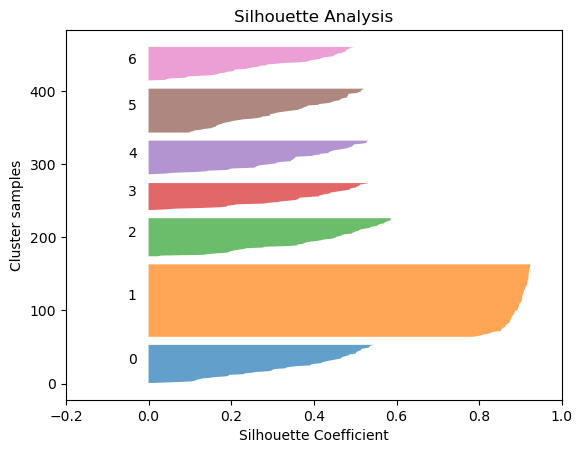

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Overall Silhouette Score: 0.49


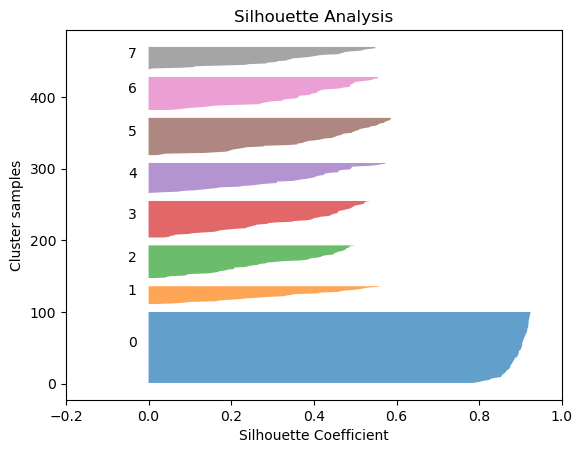

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Overall Silhouette Score: 0.34


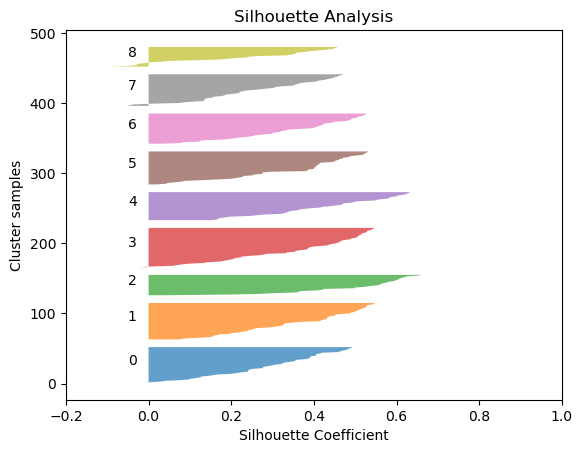

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Overall Silhouette Score: 0.33


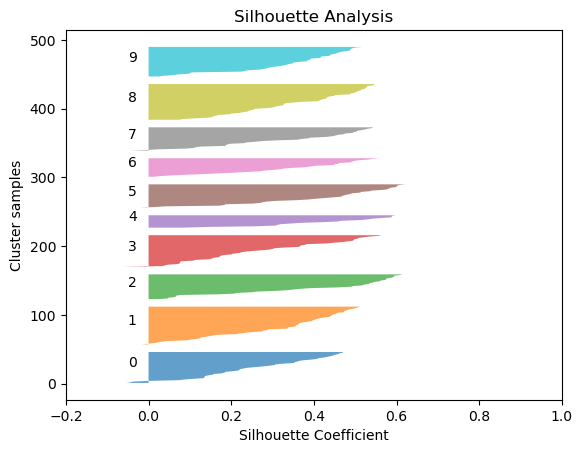

In [19]:
for cluster_count in range(2, 11):
    Kmean = skl_cluster.KMeans(n_clusters=cluster_count)
    Kmean.fit(data)
    pred_cluster_id = Kmean.predict(data)
    plot_silhouette(data, pred_cluster_id)


## Solution
The silhouette score correctly identifies N=4 as the most appropriate clustering configuration in this case. The silhouette can act as a useful guide in selecting cluster number, but it doesn't always produce perfect results. Clustering with different feature sets or exploring different clustering algorithms may yield different results.


## Exercise: K-Means with overlapping clusters
Adjust the program above (near top of notebook) to increase the standard deviation of the blobs (the `cluster_std` parameter to `make_blobs`) to a value of 1 and rerun all cells leading up to (and including) the sillhouette plotting program. 

- Do the clusters that are identified make sense?  
- Is there any strange behaviour?

## Solution
In this case, you should see that the silhouette score selects N=2 as the most likely number of true clusters. This illustrates how sensitive the silhouette score can be to slighlty overlapping clusters. The silhouette assumes real-world clusters should be far apart from each other, but this is not always the case. Figuring out better ways to represent or "embed the data" into a new feature space may improve results here.

## Clustering nonlinear data with kmeans
Kmeans is designed to find local neighborhoods of clusters in feature space. What happens if we try to cluster data which isn't organized into discrete local clusters? Let's try this out with some concentric circle lcusters.

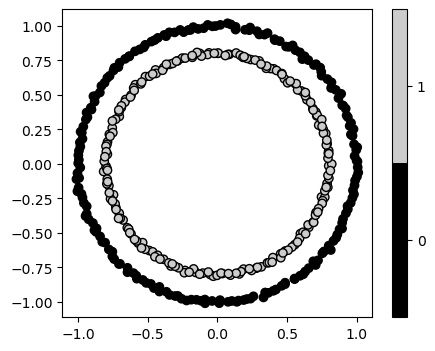

In [23]:
import sklearn.datasets as skl_data

circle_data, circle_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)
plot_true_clusters(circle_data, circle_clusters)

In [24]:
N_pred_clusters = 2

# Run KMeans
Kmean_cirlcles = skl_cluster.KMeans(n_clusters=N_pred_clusters)
Kmean_cirlcles.fit(circle_data)
pred_circle_clusters = Kmean_cirlcles.predict(circle_data)

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


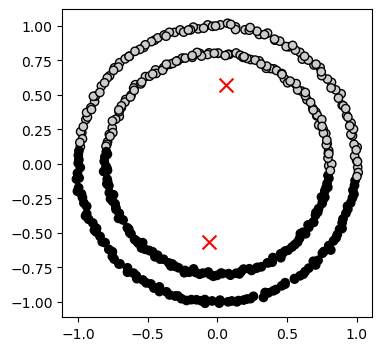

In [25]:
# plot predicted clusters
plot_pred_clusters(circle_data, pred_circle_clusters, Kmean_cirlcles)

## Spectral clustering

Spectral clustering is a technique that attempts to overcome the linear boundary problem of k-means clustering. It works by treating clustering as a graph partitioning problem and looks for nodes in a graph with a small distance between them.

In the case of two concentric circles, points on the same circle are strongly connected (they're close along the ring), but points on different circles are less connected (since the shortest straight-line distance between inner and outer points is larger and doesn’t respect the circular structure). Spectral clustering converts this graph into a matrix and computes its eigenvectors—mathematically identifying the most "natural" way to cut the graph into separate groups while minimizing the number of connections between the groups.

This is why spectral clustering succeeds where k-means fails: instead of trying to split based on distance in the raw input space, it leverages the connectivity structure of the graph. That lets it cleanly separate the inner and outer rings—even though there’s no linear boundary that can do that in 2D space.

Here is an example of spectral clustering on two concentric circles:

![Spectral clustering on two concentric circles](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn/gh-pages/fig//spectral_concentric_circle.png)

You can also think of spectral clustering as transforming the data into a new space where the structure is easier to separate (sometimes called the "kernel trick"). In that new space, the two rings become distinct blobs, and a simple algorithm like k-means can do the final separation there. T

![Spectral clustering viewed with an extra dimension](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn/gh-pages/fig//spectral_concentric_3d.png)

See [this](https://www.cvl.isy.liu.se/education/graduate/spectral-clustering/SC_course_part1.pdf) introduction to spectral clustering if you are interested in more details about how spectral clustering works.


### Spectral clustering with Scikit-Learn

Lets try out using Scikit-Learn's spectral clustering. We can use the same circle data we generated for the KMeans example.

The code for calculating the SpectralClustering is very similar to the kmeans clustering, but instead of using the sklearn.cluster.KMeans class we use the `sklearn.cluster.SpectralClustering` class.

In [26]:
# init spectral clustering algorithm
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

The SpectralClustering class combines the fit and predict functions into a single function called fit_predict.

C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Patron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


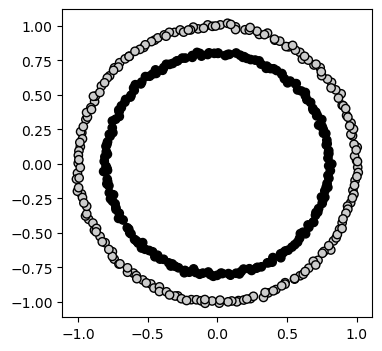

In [27]:
# fit_predict
labels = model.fit_predict(circle_data)

# plot pred clusters
plot_pred_clusters(circle_data, labels, None)

### Spectral clustering on a larger dataset
Repeat this clustering process again using 4000 samples instead of 400. What do you observe?

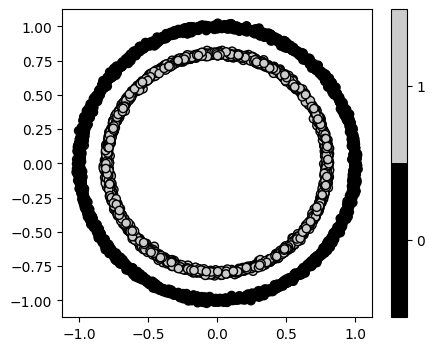

In [29]:
import sklearn.datasets as skl_data

circle_data, circle_clusters = skl_data.make_circles(n_samples=4000, noise=.01, random_state=0)
plot_true_clusters(circle_data, circle_clusters)

C:\Users\admin2\Desktop\ML_workshop\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


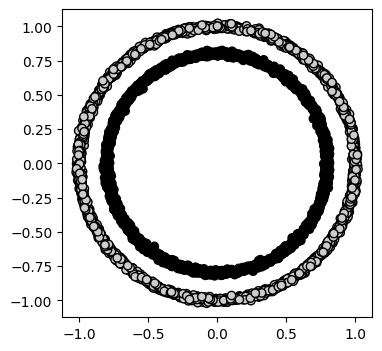

In [30]:
# init model
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

# fit_predict
labels = model.fit_predict(circle_data)

# plot pred clusters
plot_pred_clusters(circle_data, labels, None)

### Solution 
It takes a bit longer for the result to return. Spectral clustering is more expensive than k-means because it computes similarities between all pairs of points and performs an eigen-decomposition, while k-means only compares points to a few centroids.